## Project: Investigate a Dataset - [Medical Appointment No Shows]

### Dataset Description

The following dataset "Medical Appointment No Shows" consist of 110,527 rows of data and 14 variables detailing patients' characteristics and more importantly whether they show up to a medical appointment or not in Brazil.

The 14 variables (columns/characteristics) provided in the dataset are the following:
1. PatientId - unique identification of a patient
2. AppointmentID - unique identification of an appointment
3. Gender - binary identifier of a patient's gender (Male / Female)
4. ScheduledDay - date that someone called/registered to setup an appointment
5. AppointmentDay - actual date the appointment is scheduled and expected for patient to attend
6. Age - numerical value representing how old the patient is
7. Neighbourhood - location where the appointment takes place
8. Scholarship - binary identifier of whether a patient is enrolled in the  "Bolsa Familia" social welfare program in Brazil
9. Hipertension - binary identifier indicating whether a patient has hypertension (True / False)
10. Diabetes - binary identifier indicating whether a patient has diabetes (True / False)
11. Alcoholism - binary identifier indicating whether a patient is an alcoholic (True / False)
12. Handcap - binary identifier indicating whether a patient is handicap (True / False)
13. SMS_received - binary identifier indicating whether a patient received any messages reminding them of their appointment (True / False)
14. No-show - binary identifier indicating whether a patient showed up for their appointment (True / False)

### Data Wrangling

In this section of the report, I will import my packages, load in the data, check for cleanliness, and then trim and clean the dataset for analysis.

In [1]:
# Import packages that will be used
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# Load dataset
df = pd.read_csv('KaggleV2-May-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### Assess Dataset

In [6]:
# Inspect data type of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [8]:
# Show summary for all columns
df.describe(include = 'all')

# Minimum value for age is -1. This will need to be addressed in the data cleaning section

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
count,1.105270e+05,1.105270e+05,110527,110527,110527,110527.000000,110527,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527
unique,NaN,NaN,2,103549,27,NaN,81,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,F,2016-05-06T07:09:54Z,2016-06-06T00:00:00Z,NaN,JARDIM CAMBURI,NaN,NaN,NaN,NaN,NaN,NaN,No
freq,NaN,NaN,71840,24,4692,NaN,7717,NaN,NaN,NaN,NaN,NaN,NaN,88208
mean,1.474963e+14,5.675305e+06,NaN,NaN,NaN,37.088874,NaN,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,NaN
std,2.560949e+14,7.129575e+04,NaN,NaN,NaN,23.110205,NaN,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,NaN
min,3.921784e+04,5.030230e+06,NaN,NaN,NaN,-1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,4.172614e+12,5.640286e+06,NaN,NaN,NaN,18.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,3.173184e+13,5.680573e+06,NaN,NaN,NaN,37.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,9.439172e+13,5.725524e+06,NaN,NaN,NaN,55.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN


In [10]:
# Check for number of unique patients
df['PatientId'].nunique()

62299

In [12]:
# Check for number of unique appointments made
df['AppointmentID'].nunique()

110527

In [14]:
# Inspect for any duplicate data
df.duplicated().sum() #No duplicated rows

0

In [16]:
# Inspect for any missing values
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [18]:
# Investigate values in handicap
df.Handcap.unique()
# There are multiple values for handicap. 
# It may be a categorical variable indicating either severity of patient's handicap or the number of handicap a patient has

array([0, 1, 2, 3, 4], dtype=int64)

In [20]:
# Investigate values in age
df['Age'].value_counts()

# Age cannot be -1. This may be a mistake and will be rectified in the data cleaning section

Age
 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
        ... 
 115       5
 100       4
 102       2
 99        1
-1         1
Name: count, Length: 104, dtype: int64

### Data Cleaning

#### Based on an initial inspection of the data, the following tasks will need to be performed to cleanup the dataset:

1. Rename column names as some are misspelled
2. Change the variables to correct data types
3. Fix the minimum value of age where the min value is -1

In [24]:
# Fix spellings for the following columns: 'Hipertension' and 'Handcap'
df.rename(columns = {'Hipertension':"Hypertension", 'Handcap':'Handicap', 'SMS_received': 'SMS Received'} , inplace=True)

In [26]:
# Change variables to datetime
for c in ['ScheduledDay', 'AppointmentDay']:
    df[c] = pd.to_datetime(df[c])
    
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hypertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handicap        110527 non-null  int64              
 12  SMS Received    110527 non-null  int64              
 13  No-show       

In [28]:
# Change variables to boolean
for c in ['Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', 'SMS Received']:
    df[c] = df[c].astype('bool')
    
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  bool               
 8   Hypertension    110527 non-null  bool               
 9   Diabetes        110527 non-null  bool               
 10  Alcoholism      110527 non-null  bool               
 11  Handicap        110527 non-null  int64              
 12  SMS Received    110527 non-null  bool               
 13  No-show       

In [30]:
# Change variables to categorical
for c in ['Gender', 'Neighbourhood', 'Handicap']:
    df[c] = df[c].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  category           
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  category           
 7   Scholarship     110527 non-null  bool               
 8   Hypertension    110527 non-null  bool               
 9   Diabetes        110527 non-null  bool               
 10  Alcoholism      110527 non-null  bool               
 11  Handicap        110527 non-null  category           
 12  SMS Received    110527 non-null  bool               
 13  No-show       

In [32]:
# Change No-show values to boolean values
df.loc[df['No-show'] == "No", ['No-show']] = 0
df.loc[df['No-show'] == "Yes", ['No-show']] = 1
df['No-show'] = df['No-show'].astype('bool')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  category           
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  category           
 7   Scholarship     110527 non-null  bool               
 8   Hypertension    110527 non-null  bool               
 9   Diabetes        110527 non-null  bool               
 10  Alcoholism      110527 non-null  bool               
 11  Handicap        110527 non-null  category           
 12  SMS Received    110527 non-null  bool               
 13  No-show       

In [34]:
# Rectify the "-1" in age based on the min value as saw in df.describe row
df.loc[df['Age'] == -1, ['Age']] = 0
df['Age'].value_counts()

Age
0      3540
1      2273
52     1746
49     1652
53     1651
       ... 
98        6
115       5
100       4
102       2
99        1
Name: count, Length: 103, dtype: int64

## Exploratory Data Analysis

### Question 1: How often are appointments missed (i.e., How often is No-Show = True) ? 

In [38]:
# Find the counts of values for No-show column
noshow_df = df['No-show'].value_counts().reset_index()
print(noshow_df)
print("False means patient did show up for their appointment, whereas true means patient was a 'No-show' and did not show up for their appointment")

   No-show  count
0    False  88208
1     True  22319
False means patient did show up for their appointment, whereas true means patient was a 'No-show' and did not show up for their appointment


In [40]:
# Convert the counts into percentages to find % of appointments where patients did not show up
noshow = df[df['No-show'] == True]['PatientId'].count()
show = df[df['No-show'] == False]['PatientId'].count()
noshow_proportion = noshow/(noshow + show)
noshow_proportion 

0.20193255946510807

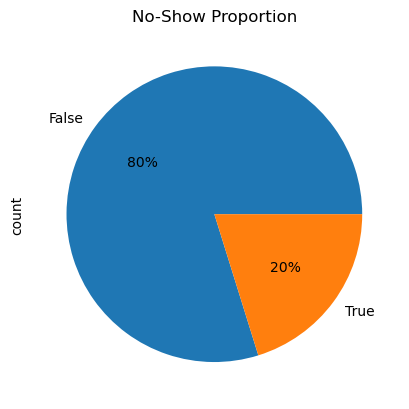

In [42]:
# Create pie-chart to visualize the proportion breakdown of patients who showed up for their appointment versus those who did not
df['No-show'].value_counts().plot(kind='pie', title = "No-Show Proportion", autopct='%1.0f%%')
print('')

There are 22319 no-shows, which accounts for ~20% of all appointments. Appointments are missed approx. ~20% of the time.

### Question 2: Is there a difference between male and female not showing up for their appointments?

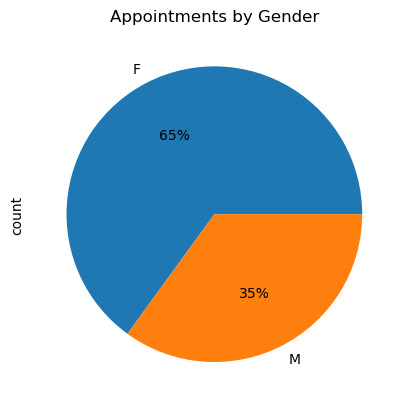

In [46]:
# Appointment counts by gender
df['Gender'].value_counts().plot(kind='pie', title = "Appointments by Gender",  autopct='%1.0f%%')
print ('')

Most appointments are made by Female patients

In [49]:
# Find the no-shows by gender
noshow_gender_df = df.groupby(['Gender', 'No-show']).count()['PatientId'].reset_index()
noshow_gender_df.rename(columns = {'PatientId': 'Counts'}, inplace=True)
noshow_gender_df

C:\Users\yijia\AppData\Local\Temp\ipykernel_5240\2296930413.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  noshow_gender_df = df.groupby(['Gender', 'No-show']).count()['PatientId'].reset_index()


,Gender,No-show,Counts
0,F,False,57246
1,F,True,14594
2,M,False,30962
3,M,True,7725


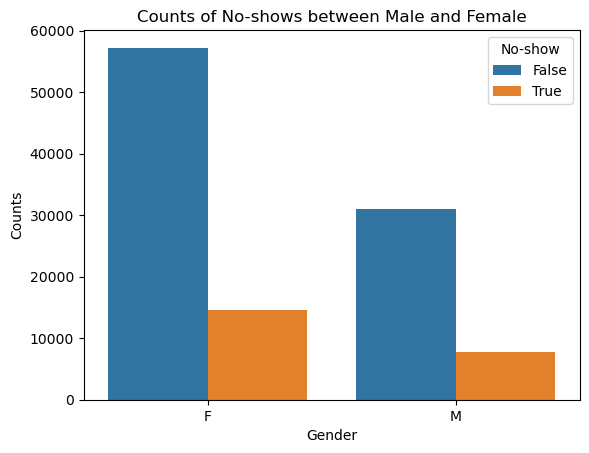

In [51]:
# Create double barplot to visualize the no-shows between female and male patients

def doublebar_plot(xvar, yvar, ylabelname, titlename, huevar, dataframe):
    df_plot = sns.barplot(x = xvar, y = yvar, hue=huevar, data=dataframe)
    df_plot.set(ylabel = ylabelname, title = titlename)
    return df_plot
    
doublebar_plot('Gender', 'Counts', 'Counts', 'Counts of No-shows between Male and Female', 'No-show', noshow_gender_df)
print('')

Visually looking, it appears that female and male counts of no-shows are roughly the same. Will further refine this analysis by getting the percentages of female and male patients no-shows

In [54]:
# Find proportion of female no-show
female_noshow_df = noshow_gender_df.loc[noshow_gender_df['Gender'] == 'F']
total_female_noshow = female_noshow_df['Counts'].sum()
female_noshow_df['Proportion'] = female_noshow_df['Counts'] / total_female_noshow #add it back to the main noshow_gender_df table
female_noshow_df

C:\Users\yijia\AppData\Local\Temp\ipykernel_5240\1348702336.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  female_noshow_df['Proportion'] = female_noshow_df['Counts'] / total_female_noshow #add it back to the main noshow_gender_df table


,Gender,No-show,Counts,Proportion
0,F,False,57246,0.796854
1,F,True,14594,0.203146


In [56]:
# Find proportion of male no-show
male_noshow_df = noshow_gender_df.loc[noshow_gender_df['Gender'] == 'M']
total_male_noshow = male_noshow_df['Counts'].sum()
male_noshow_df['Proportion'] = male_noshow_df['Counts'] / total_male_noshow #add it back to the main noshow_gender_df table
male_noshow_df

C:\Users\yijia\AppData\Local\Temp\ipykernel_5240\1404494994.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  male_noshow_df['Proportion'] = male_noshow_df['Counts'] / total_male_noshow #add it back to the main noshow_gender_df table


,Gender,No-show,Counts,Proportion
2,M,False,30962,0.800321
3,M,True,7725,0.199679


In [58]:
# Combine the male and female no-show tables together
merged_df = pd.concat([male_noshow_df, female_noshow_df])
merged_df

,Gender,No-show,Counts,Proportion
2,M,False,30962,0.800321
3,M,True,7725,0.199679
0,F,False,57246,0.796854
1,F,True,14594,0.203146


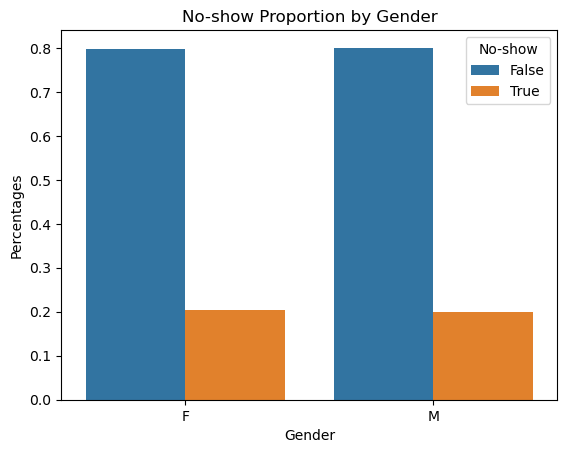

In [60]:
# Create double bar graph to visualize the differences in proportion of no-shows between females and males
doublebar_plot('Gender', 'Proportion', 'Percentages', 'No-show Proportion by Gender', 'No-show', merged_df)
print("")

Looking at the double bargraph, the proportion of female and male patients' no-shows are roughly the same. There is no significant difference in noshow proportion between female and male patients

### Question 3: Is there a difference between patients with scholarship versus those without scholarship show up for their appointments?

In [64]:
# Appointment counts by scholarship
scholarship_df = df['Scholarship'].value_counts().reset_index()
scholarship_df

,Scholarship,count
0,False,99666
1,True,10861


In [66]:
# Find the no-shows by scholarship
noshow_scholarship_df = df.groupby(['Scholarship', 'No-show']).count()['PatientId'].reset_index()
noshow_scholarship_df.rename(columns = {'PatientId': 'Counts'}, inplace=True)
noshow_scholarship_df

,Scholarship,No-show,Counts
0,False,False,79925
1,False,True,19741
2,True,False,8283
3,True,True,2578


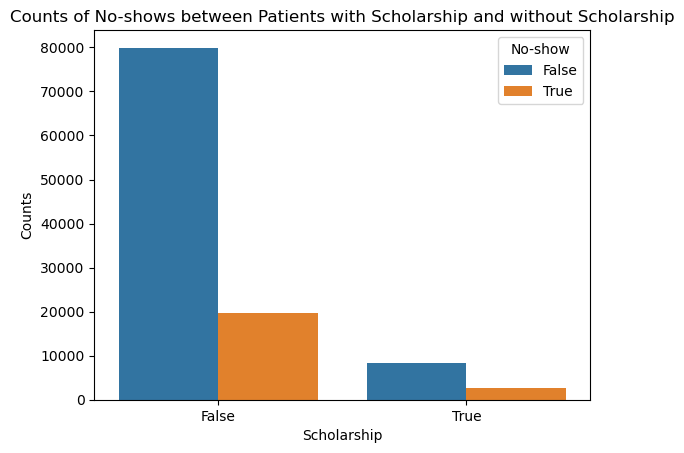

In [68]:
# Create double barplot to visualize the no-shows between patients with scholarship and those without scholarship
doublebar_plot('Scholarship', 'Counts', 'Counts', 'Counts of No-shows between Patients with Scholarship and without Scholarship', 
               'No-show', noshow_scholarship_df)
print('')

Visually looking, it appears that patients with scholarship and without scholarship did not show up for their appoitment about the same ratio. Will further refine this analysis by finding the proportional relationship.

In [71]:
# Find proportion of patients with scholarship no-show
scholarship_noshow_df = noshow_scholarship_df.loc[noshow_scholarship_df['Scholarship'] == True]
total_scholarship_noshow = scholarship_noshow_df['Counts'].sum()
scholarship_noshow_df['Proportion'] = scholarship_noshow_df['Counts'] / total_scholarship_noshow #add it back to the main noshow_gender_df table
scholarship_noshow_df

C:\Users\yijia\AppData\Local\Temp\ipykernel_5240\601576894.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scholarship_noshow_df['Proportion'] = scholarship_noshow_df['Counts'] / total_scholarship_noshow #add it back to the main noshow_gender_df table


,Scholarship,No-show,Counts,Proportion
2,True,False,8283,0.762637
3,True,True,2578,0.237363


In [73]:
# Find proportion of patients with without scholarship no-show
no_scholarship_noshow_df = noshow_scholarship_df.loc[noshow_scholarship_df['Scholarship'] == False]
total_no_scholarship_noshow = no_scholarship_noshow_df['Counts'].sum()
no_scholarship_noshow_df['Proportion'] = no_scholarship_noshow_df['Counts'] / total_no_scholarship_noshow #add it back to the main noshow_gender_df table
no_scholarship_noshow_df

C:\Users\yijia\AppData\Local\Temp\ipykernel_5240\1309629400.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_scholarship_noshow_df['Proportion'] = no_scholarship_noshow_df['Counts'] / total_no_scholarship_noshow #add it back to the main noshow_gender_df table


,Scholarship,No-show,Counts,Proportion
0,False,False,79925,0.801928
1,False,True,19741,0.198072


In [75]:
# Combine the scholarship and without no-show tables together
merged_df_scholarship = pd.concat([scholarship_noshow_df, no_scholarship_noshow_df])
merged_df_scholarship

,Scholarship,No-show,Counts,Proportion
2,True,False,8283,0.762637
3,True,True,2578,0.237363
0,False,False,79925,0.801928
1,False,True,19741,0.198072


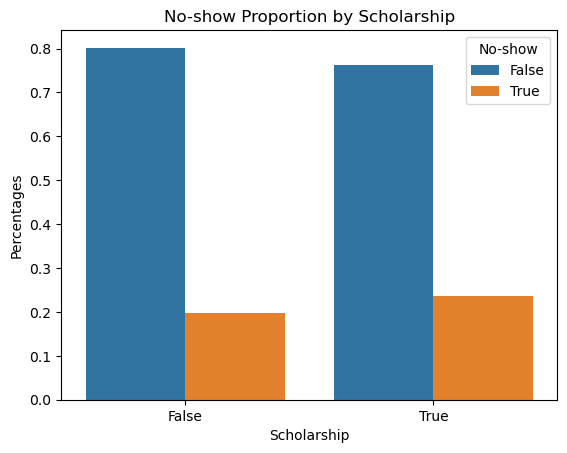

In [77]:
# Create double barplot to visualize the no-shows between patients with scholarship and those without scholarship
doublebar_plot('Scholarship', 'Proportion', 'Percentages', 'No-show Proportion by Scholarship', 
               'No-show', merged_df_scholarship)
print('')

It appears that the percentage of people with scholarship showed up to their appointment is higher than patients without scholarship. However the percentage difference is not that big looking at the visual. Additional investigation/hypothesis testing will be needed to determine if the percent difference is significant or not.

## Conclusion

#### Question 1: How often are appointments missed (i.e., How often is No-Show = True) ?

Appointments are missed approximately 20% of the time. 

#### Question 2: Is there a difference between male and female not showing up for their appointments?

No, there is no difference between male and female patients not showing up for their appointments

### Question 3: Is there a difference between patients with scholarship versus those without scholarship show up for their appointments?

It appears that the percentage of people with scholarship showed up to their appointment is higher than patients without scholarship. However the percentage difference is not that big looking at the visual. Additional investigation/hypothesis testing will be needed to determine if the percent difference is significant or not.

#### Additional Research That Could Be Performed

Additional research that could be performed on the dataset are the following:

* Identify if different ailments (i.e., whether a patient has hypertension, handicaped, Diabetes, or alcoholism) indicate whether patients are more likely to show having an ailment versus not
* Identify whether a patient that received a SMS message is more likely to show up for their appointment or not
* Identify if whether different groups of patients show up less likely / more likely for their appointments (i.e., patients with scholarship, patients using different neighborhood locations, age, etc.)

#### Limitations

The limitations for this dataset are the following:

* Patients' likelihood of showing up for their appointment could be impacted by whether they have single ailment, multiple ailment, or none. It will be helpful to know if patient's appointment is due to 1 of their ailment or multiple. If it is multiple, it may impact the likelihood of patients showing up for their appointment versus thsoe with either no ailment or only 1. 
* There are only 62299 unique patients, but ~110K appointments created. Some patients may have created multiple appointments. As for the cause of those are unknown. Patients may have accidently created multiple appointments, or patients may have a legitimate reason that may require multiple appointments. Accidental appointments created could be removed from the dataset as it may impact some of the findings.

In [91]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Investigate_a_Dataset.ipynb

[NbConvertApp] Converting notebook Investigate_a_Dataset.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 6 image(s).
[NbConvertApp] Writing 532238 bytes to Investigate_a_Dataset.html
